<a href="https://colab.research.google.com/github/Akash-nitA/credit_card_fraud/blob/main/creditcard_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(12,8))
data = pd.read_csv("creditcard.csv")

--2022-01-29 13:00:08--  https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/csv]
Saving to: ‘creditcard.csv’

creditcard.csv      100%[===================>] 143.84M  88.1MB/s    in 1.6s    

2022-01-29 13:00:10 (88.1 MB/s) - ‘creditcard.csv’ saved [150828752/150828752]



<Figure size 864x576 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

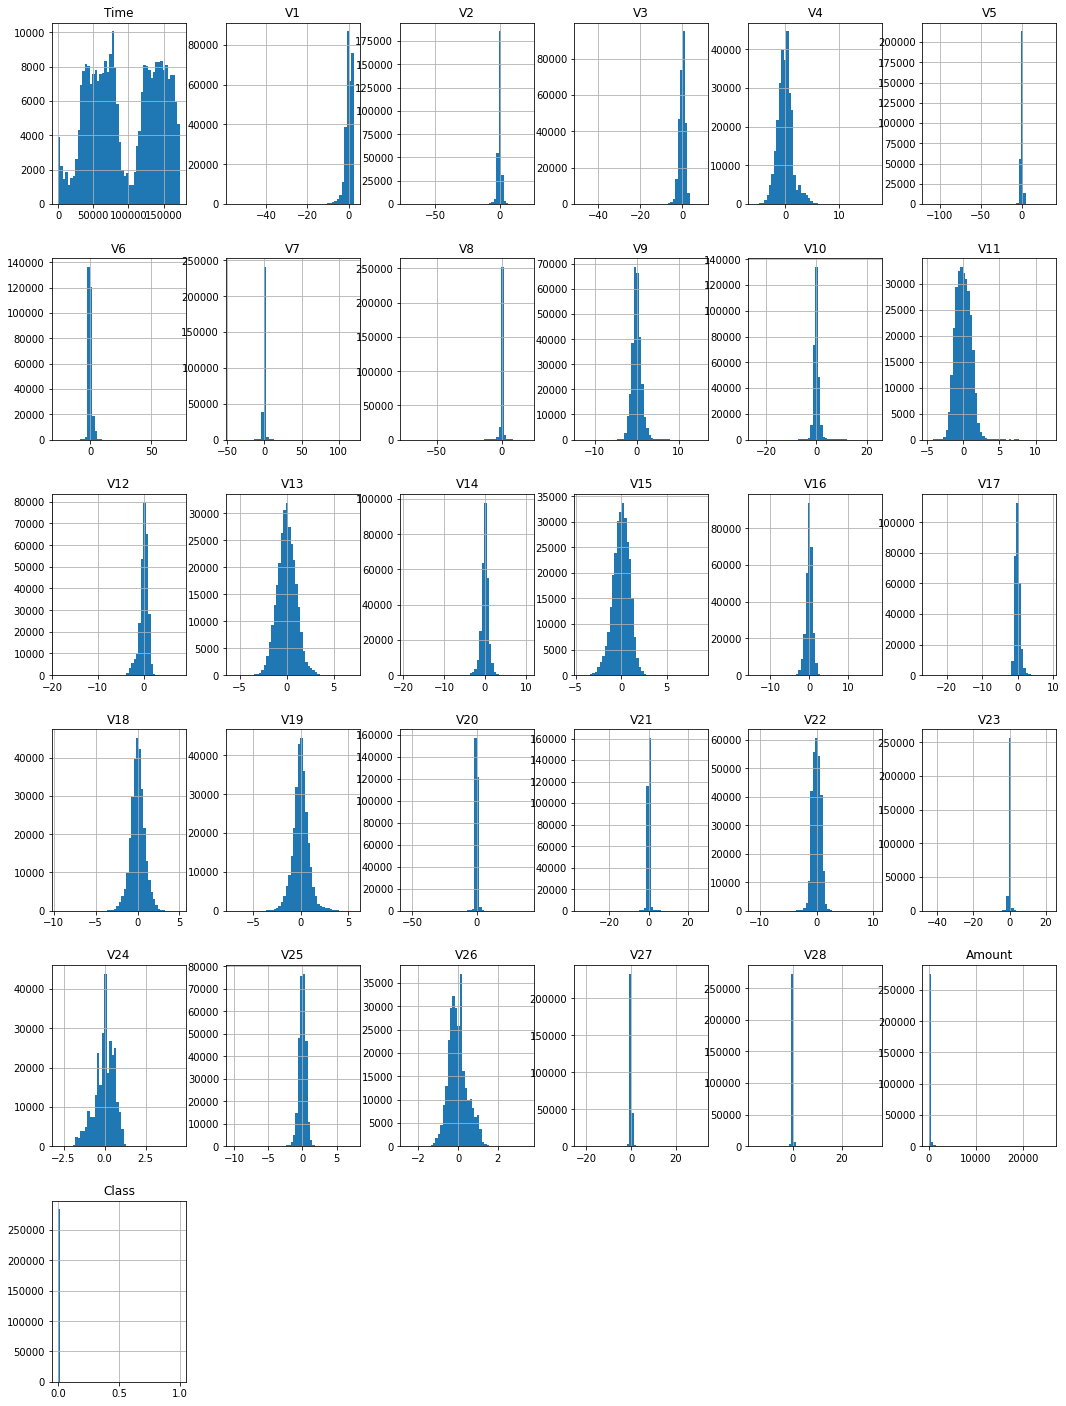

In [ ]:
variables = [x for x in data.columns]
Skewnesss =  data[variables].skew()
data.hist(bins=50, figsize=(18,25))
plt.show()

In [ ]:
df = data.copy()
df['Amount'] = [0.001+x for x in data['Amount']]
df['Amount'] = np.log10(df['Amount'])
df = df.drop(['Time'], axis =1)

In [ ]:
y=df['Class']
x=df.drop('Class',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)
x_test,x_validation,y_test,y_validation=train_test_split(x_test,y_test,test_size=0.2,shuffle=True)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_validation=sc.transform(x_validation)

In [ ]:
x_train=np.clip(x_train,-5,5)
x_test=np.clip(x_test,-5,5)
x_validation=np.clip(x_validation,-5,5)

In [ ]:
y_train=np.expand_dims(y_train,axis=1)

In [ ]:
dataset=np.append(x_train,y_train,axis=1)
dataset=pd.DataFrame(dataset,columns=df.columns)

In [ ]:
dataframe0=dataset[dataset['Class']==0]
dataframe1=dataset[dataset['Class']==1]

In [ ]:
bias=np.log(dataframe1.shape[0]/dataframe0.shape[0])

In [ ]:
sb.jointplot(data=dataframe1,x="V1",y="V2")
plt.show()
sb.jointplot(data=dataframe0,x="V1",y="V2")
plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.metrics import AUC,Precision,Recall
# import tensorflow_Addons as tfa

In [ ]:
def probitmodel():
  model=Sequential()
  model.add(Dense(8,activation='relu',input_shape=(29,),bias_initializer=tf.keras.initializers.Constant(bias)))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid',kernel_regularizer='l2'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['AUC','Precision','Recall'])
  model.summary()
  return model
  

In [ ]:
m=probitmodel()
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=100,restore_best_weights=1)
m.evaluate(x_test[:10],y_test[:10])
m.save_weights('./')
history_0=m.fit(x_train,y_train,validation_data=[x_test,y_test],callbacks=callback,epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 240       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 3s 3s/step - loss: 0.7209 - auc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1/20
7121/7121 [==============================] - 51s 7ms/step - loss: 0.1584 - auc: 0.4956 - precision: 0.1429 - recall: 0.0025 - val_loss: 0.0236 - val_auc: 0.5144 - val_precision: 0.000

In [ ]:
# weights=m.get_weights()

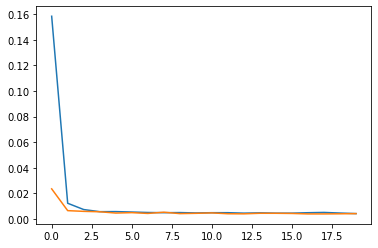

In [ ]:
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.show()